In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv("large_smart_sustainability_dataset.csv")

# Select features and target
features = [
    "Brand Score", "Cost Price (cp)", "Selling Price (sp)",
    "Days to Expire", "Demand Factor", "Quantity Left"
]
target = "Discount (%)"

# Drop rows with missing values
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define model and parameter grid
xgb_model = xgb.XGBRegressor(random_state=42)

param_dist = {
    "n_estimators": [500, 1000, 2000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 6],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}

# Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="r2",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:")
print(random_search.best_params_)
print(f"\nR2 Score: {r2:.4f}")
print(f"MSE     : {mse:.4f}")

# Display Actual vs Predicted
result_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print("\nActual vs Predicted (sample):")
print(result_df.head(2000).to_string(index=False))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

R2 Score: 0.9998
MSE     : 0.0043

Actual vs Predicted (sample):
 Actual  Predicted
  14.49  14.462420
  12.54  12.633271
   3.60   3.662039
   9.36   9.354348
  14.28  14.302412
  16.98  16.983643
  15.96  16.010584
   9.39   9.223794
   3.63   3.733325
  11.58  11.685791
  16.35  16.249653
   9.45   9.438334
  12.39  12.430203
  21.15  21.199722
   7.23   7.241712
  16.65  16.681684
  15.21  15.191916
  14.19  14.165397
  10.53  10.558117
  17.94  17.885983
  15.24  15.274373
  10.86  10.884068
  23.43  23.472376
  18.63  18.640921
   8.46   8.550227
   7.89   7.972575
  21.90  21.901697
   1.56   1.572682
  19.08  18.919458
   6.06   6.035003
   2.79   2.836126
   9.15   9.128410
  18.48  18.501225
  11.10  11.204319
   8.37   8.390643
  13.62  13.608927
   3.36   3.4676

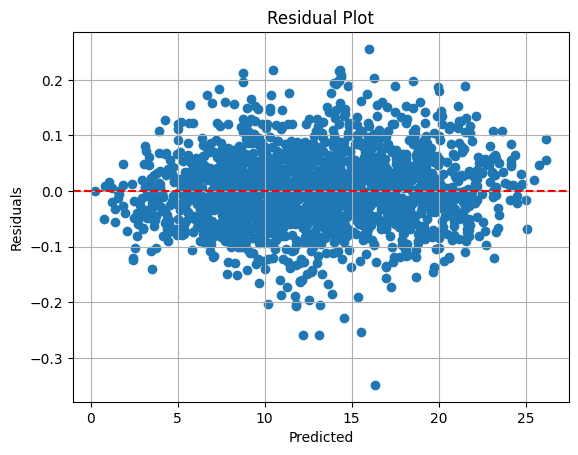

In [2]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


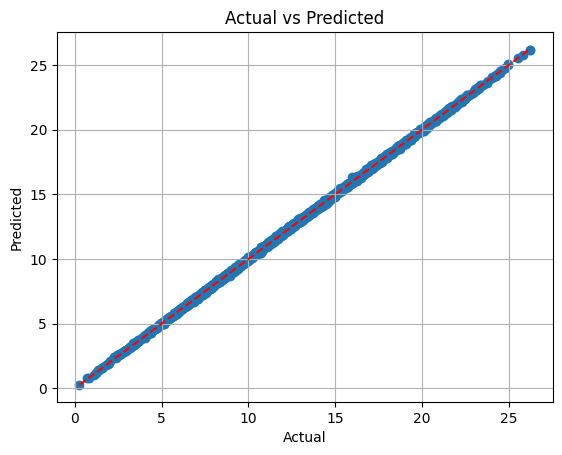

In [3]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [4]:
import joblib

# Save trained model
joblib.dump(best_model, "xgb_model.pkl")

# Save the scaler used for preprocessing
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']